In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
import numpy as np
from scipy.stats import norm

Introduction to Langevin Dynamics

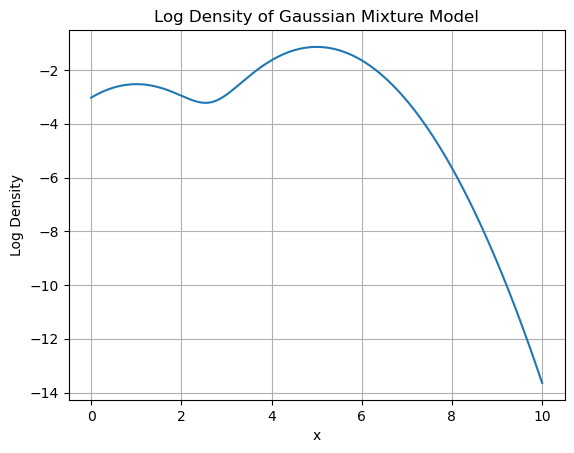

In [3]:
def gmm_log_density(x, mu1, sigma1, mu2, sigma2, pi1=0.5):
    """
    计算双峰高斯混合分布的对数概率密度
    
    参数:
    x: 输入点
    mu1, mu2: 两个高斯分布的均值
    sigma1, sigma2: 两个高斯分布的标准差
    pi1: 第一个高斯分布的权重 (0 <= pi1 <= 1)
    """
    pi2 = 1 - pi1
    
    # 计算两个高斯分布的概率密度
    gauss1 = norm.pdf(x, mu1, sigma1)
    gauss2 = norm.pdf(x, mu2, sigma2)
    
    # 计算混合分布的概率密度
    gmm_density = pi1 * gauss1 + pi2 * gauss2
    
    # 返回对数概率密度
    return np.log(gmm_density)

# 示例使用

x = np.linspace(0, 10, 1000)
log_density = gmm_log_density(x, mu1=1, sigma1=1, 
                                mu2=5, sigma2=1, 
                                pi1=0.2)

import matplotlib.pyplot as plt
plt.plot(x, log_density)
plt.title('Log Density of Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('Log Density')
plt.grid(True)
plt.show()

In [4]:
import torch
torch.randn(10,1).reshape(10).detach().numpy().astype(np.float16)

array([ 1.345  , -0.1538 ,  1.248  , -0.04642, -0.2583 , -0.796  ,
        1.517  , -0.534  , -0.71   , -0.3706 ], dtype=float16)

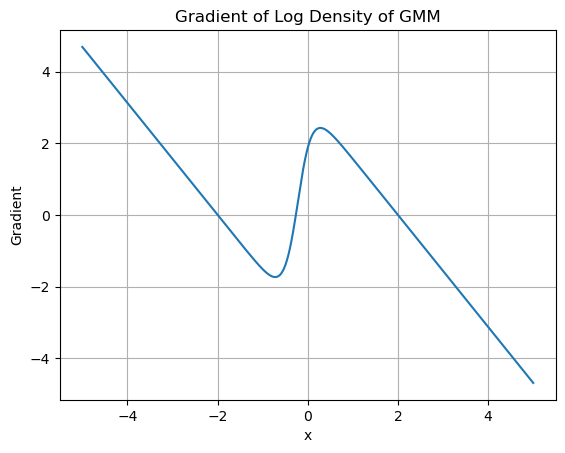

In [5]:
import numpy as np
from scipy.stats import norm

def gmm_log_density_gradient(x, mu1, sigma1, mu2, sigma2, pi1=0.5):
    """
    计算双峰高斯混合分布对数密度的梯度
    """
    pi2 = 1 - pi1
    
    # 计算各个高斯分布的pdf
    gauss1 = norm.pdf(x, mu1, sigma1)
    gauss2 = norm.pdf(x, mu2, sigma2)
    
    # 计算各个高斯分布的导数
    grad_gauss1 = gauss1 * (-(x - mu1) / (sigma1**2))
    grad_gauss2 = gauss2 * (-(x - mu2) / (sigma2**2))
    
    # 计算混合分布的梯度
    numerator = pi1 * grad_gauss1 + pi2 * grad_gauss2
    denominator = pi1 * gauss1 + pi2 * gauss2
    
    # 返回对数密度的梯度
    return numerator / denominator

# 可视化示例

x = np.linspace(-5, 5, 1000)
gradient = gmm_log_density_gradient(x, mu1=-2, sigma1=0.8, 
                                        mu2=2, sigma2=0.8, 
                                        pi1=0.2)

import matplotlib.pyplot as plt
plt.plot(x, gradient)
plt.title('Gradient of Log Density of GMM')
plt.xlabel('x')
plt.ylabel('Gradient')
plt.grid(True)
plt.show()

In [6]:
import numpy as np
np.random.randn(1)

array([-0.15250738])

In [7]:

def returngre(mu1,mu2,pi1,r):
    x0 = 0
    xo_list =[]
    for i in range(3000):
        x0 = x0 + r * gmm_log_density_gradient(x0, mu1=mu1, sigma1=1, 
                                                mu2=mu2, sigma2=1, 
                                                pi1=pi1)
        xo_list.append(x0.item())
    return xo_list

In [8]:

def returnlan(x0,mu1,mu2,pi1,r):
    x0 = x0
    xo_list =[]
    for i in range(1000):
        z = np.random.randn(1)
        x0 = x0 + r * gmm_log_density_gradient(x0, mu1=mu1, sigma1=1, 
                                                mu2=mu2, sigma2=1, 
                                                pi1=pi1)+z*np.sqrt(2*r)
        xo_list.append(x0.item())
    return xo_list

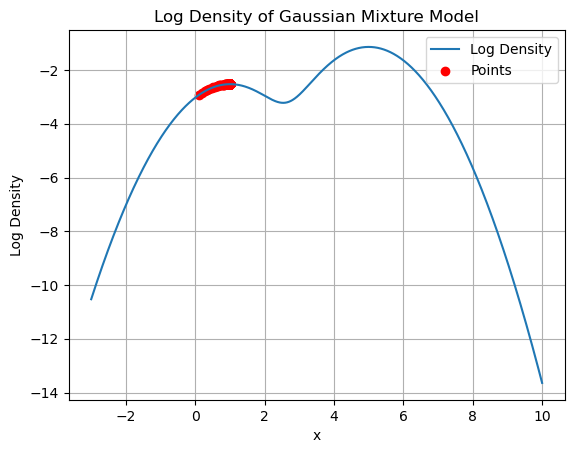

In [9]:
x = np.linspace(-3, 10, 1000)
log_density = gmm_log_density(x, mu1=1, sigma1=1, 
                                mu2=5, sigma2=1, 
                                pi1=0.2)

# 调用 returnlan 函数
points = returngre(1, 5, 0.2, 0.1)

import matplotlib.pyplot as plt
plt.plot(x, log_density, label='Log Density')
plt.scatter(points, gmm_log_density(np.array(points), mu1=1, sigma1=1, mu2=5, sigma2=1, pi1=0.2), color='red', label='Points')
plt.title('Log Density of Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('Log Density')
plt.legend()
plt.grid(True)
plt.show()

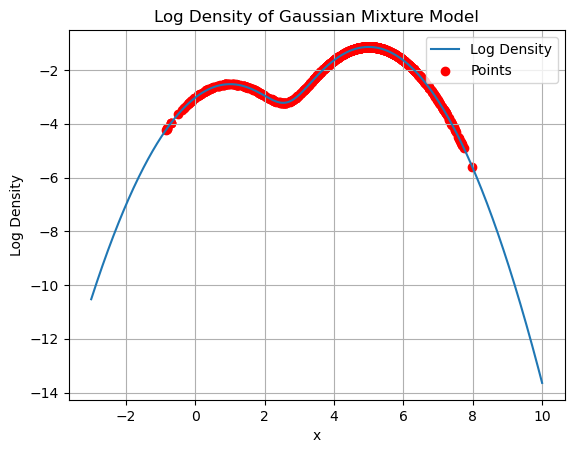

In [10]:
x = np.linspace(-3, 10, 1000)
log_density = gmm_log_density(x, mu1=1, sigma1=1, 
                                mu2=5, sigma2=1, 
                                pi1=0.2)

# 调用 returnlan 函数
points = returnlan(0,1, 5, 0.2, 0.1)

import matplotlib.pyplot as plt
plt.plot(x, log_density, label='Log Density')
plt.scatter(points, gmm_log_density(np.array(points), mu1=1, sigma1=1, mu2=5, sigma2=1, pi1=0.2), color='red', label='Points')
plt.title('Log Density of Gaussian Mixture Model')
plt.xlabel('x')
plt.ylabel('Log Density')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


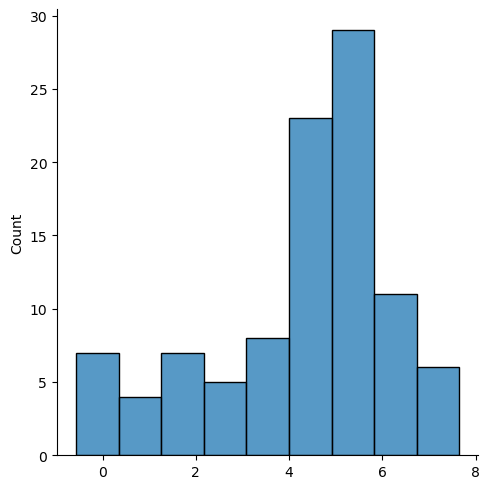

In [60]:
import seaborn as sns
rd =[]
for i in np.random.uniform(-3,3,100):
    points = returnlan(i,1, 5, 0.2, 0.1)
    rd.append(points[-1])
sns.displot(rd)

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


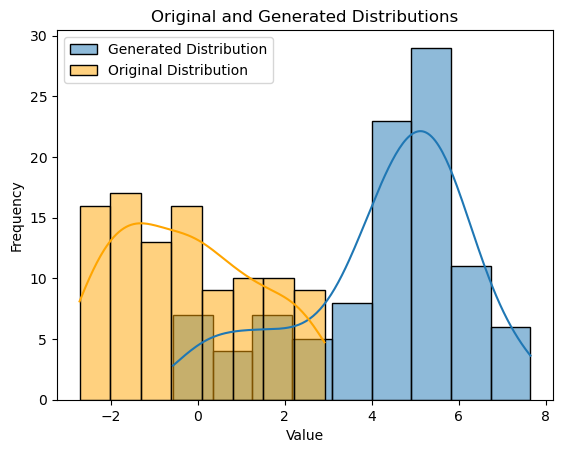

In [61]:
import matplotlib.pyplot as plt

# 绘制原始分布
sns.histplot(rd, kde=True, label='Generated Distribution')
# 绘制生成分布
sns.histplot(np.random.uniform(-3, 3, 100), kde=True, color='orange', label='Original Distribution')

plt.legend()
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [11]:
data = np.random.multivariate_normal([3, 9], [[1, 0], [0, 1]], 10000)
dataset = torch.tensor(data).float()
dataset.shape

torch.Size([10000, 2])

score_matching loss function

In [12]:
import torch.autograd as autograd

def jacobian(f, x):
    """Computes the Jacobian of f w.r.t x.
    :param f: function R^N -> R^N
    :param x: torch.tensor of shape [B, N]
    :return: Jacobian matrix (torch.tensor) of shape [B, N, N]
    """
    B, N = x.shape
    y = f(x)
    jacobian = list()
    for i in range(N):
        v = torch.zeros_like(y)
        v[:, i] = 1.
        dy_i_dx = autograd.grad(y, x, grad_outputs=v, retain_graph=True, create_graph=True, allow_unused=True)[0]  # shape [B, N]
        jacobian.append(dy_i_dx)
    jacobian = torch.stack(jacobian, dim=2).requires_grad_()
    return jacobian

In [13]:
def score_matching(model, samples, train=False):
    samples.requires_grad_(True)
    logp = model(samples)
    # Compute the norm loss
    norm_loss = torch.norm(logp, dim=-1) ** 2 / 2.
    # Compute the Jacobian loss
    jacob_mat = jacobian(model, samples)
    tr_jacobian_loss = torch.diagonal(jacob_mat, dim1=-2, dim2=-1).sum(-1)
    return (tr_jacobian_loss + norm_loss).mean(-1)

In [14]:
import torch
import torch.nn as nn
def build_score_network(input_dim=2, hidden_dim=128, num_layers=2):

    layers = []
    
    # 添加第一层
    layers.append(nn.Linear(input_dim, hidden_dim))
    layers.append(nn.Softplus())
    
    # 添加中间隐藏层
    for _ in range(num_layers - 1):
        layers.append(nn.Linear(hidden_dim, hidden_dim))
        layers.append(nn.Softplus())
    
    # 添加输出层
    layers.append(nn.Linear(hidden_dim, input_dim))
    
    # 构建模型
    model = nn.Sequential(*layers)
    
    return model

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

model = build_score_network()
# Create ADAM optimizer over our model
optimizer = optim.Adam(model.parameters(), lr=1e-3)
model(torch.tensor(data).float())
for t in range(200):
    # Compute the loss.
    loss = score_matching(model, dataset)
    # Before the backward pass, zero all of the network gradients
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    # Calling the step function to update the parameters
    optimizer.step()
    if ((t % 50) == 0):
        print(loss)

tensor(0.2794, grad_fn=<MeanBackward1>)
tensor(-0.9084, grad_fn=<MeanBackward1>)
tensor(-0.9977, grad_fn=<MeanBackward1>)
tensor(-1.0060, grad_fn=<MeanBackward1>)


In [17]:
def sample_simple(model, x, n_steps=200, eps=1e-3,returnfinal= True):
    x_sequence = [x.unsqueeze(0)]
    for s in range(n_steps):
        x = x + eps * model(x)+np.sqrt(2*eps)*torch.randn_like(x)
        x_sequence.append(x.unsqueeze(0))
    if returnfinal:
        return torch.cat(x_sequence)[-1,:]
    else:
        return torch.cat(x_sequence)

In [18]:
generate_num = 1000
x = torch.randn(generate_num,2)
samples = sample_simple(model, x,n_steps=1000).detach()
samples = samples.numpy()
samples.shape
print(samples)

[[0.75332165 7.071056  ]
 [2.315896   6.5537353 ]
 [1.3245859  6.5783577 ]
 ...
 [2.0995145  5.5346866 ]
 [0.8202601  7.1734266 ]
 [1.5430053  7.964372  ]]


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

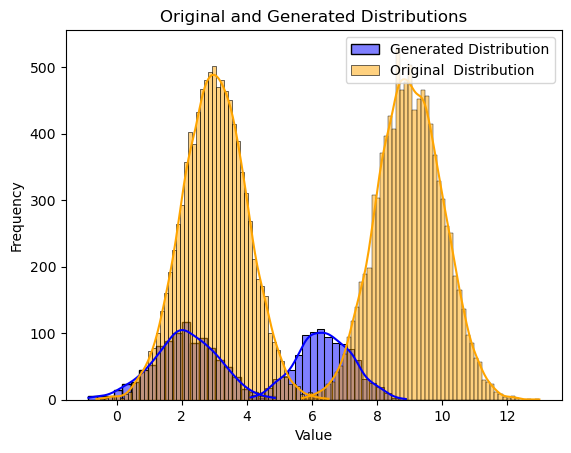

In [20]:
import seaborn as sns
sns.histplot(samples[:, 0], kde=True, label='Generated Distribution', color='blue', alpha=0.5)
sns.histplot(samples[:, 1], kde=True, color='blue', alpha=0.5)

sns.histplot(data[:, 0], kde=True, label='Original  Distribution', color='orange', alpha=0.5)
sns.histplot(data[:, 1], kde=True, color='orange', alpha=0.5)


plt.legend(loc='upper right')
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

sliced score_matching loss function

In [47]:
def sliced_score_matching(model, samples):
    samples.requires_grad_(True)
    # Construct random vectors
    vectors = torch.randn_like(samples)
    vectors = vectors / torch.norm(vectors, dim=-1, keepdim=True)
    # Compute the optimized vector-product jacobian
    logp, jvp = autograd.functional.jvp(model, samples, vectors, create_graph=True)
    # Compute the norm loss
    norm_loss = (logp * vectors) ** 2 / 2.
    # Compute the Jacobian loss
    v_jvp = jvp * vectors
    jacob_loss = v_jvp
    loss = jacob_loss + norm_loss
    return loss.mean(-1).mean(-1)

In [48]:
model = build_score_network()
# Create ADAM optimizer over our model
optimizer = optim.Adam(model.parameters(), lr=1e-3)
for t in range(200):
    # Compute the loss.
    loss = sliced_score_matching(model, dataset)
    # Before the backward pass, zero all of the network gradients
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    # Calling the step function to update the parameters
    optimizer.step()
    if ((t % 50) == 0):
        print(loss)

tensor(0.0792, grad_fn=<MeanBackward1>)
tensor(-0.2155, grad_fn=<MeanBackward1>)
tensor(-0.2512, grad_fn=<MeanBackward1>)
tensor(-0.2497, grad_fn=<MeanBackward1>)


[[2.4768927  7.6204696 ]
 [3.8535712  6.5250278 ]
 [1.7756299  7.849543  ]
 ...
 [0.20544092 6.473655  ]
 [4.3385887  5.845781  ]
 [1.076322   5.831888  ]]


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

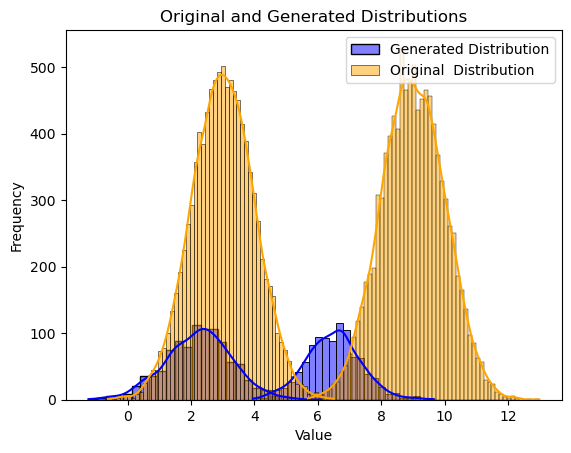

In [49]:
generate_num = 1000
x = torch.randn(generate_num,2)
samples = sample_simple(model, x,n_steps=1000).detach()
samples = samples.numpy()
samples.shape
print(samples)
sns.histplot(samples[:, 0], kde=True, label='Generated Distribution', color='blue', alpha=0.5)
sns.histplot(samples[:, 1], kde=True, color='blue', alpha=0.5)

sns.histplot(data[:, 0], kde=True, label='Original  Distribution', color='orange', alpha=0.5)
sns.histplot(data[:, 1], kde=True, color='orange', alpha=0.5)


plt.legend(loc='upper right')
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [24]:
def denoising_score_matching(scorenet, samples, sigma=0.01):
    perturbed_samples = samples + torch.randn_like(samples) * sigma
    target = - 1 / (sigma ** 2) * (perturbed_samples - samples)
    scores = scorenet(perturbed_samples)
    target = target.view(target.shape[0], -1)
    scores = scores.view(scores.shape[0], -1)
    loss = 1 / 2. * ((scores - target) ** 2).sum(dim=-1).mean(dim=0)
    return loss

In [25]:
model = build_score_network()
# Create ADAM optimizer over our model
optimizer = optim.Adam(model.parameters(), lr=1e-3)
for t in range(500):
    # Compute the loss.
    loss = denoising_score_matching(model, dataset)
    # Before the backward pass, zero all of the network gradients
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    # Calling the step function to update the parameters
    optimizer.step()
    if ((t % 50) == 0):
        print(loss)

tensor(9891.8389, grad_fn=<MulBackward0>)
tensor(9863.2324, grad_fn=<MulBackward0>)
tensor(9944.9473, grad_fn=<MulBackward0>)
tensor(9867.1553, grad_fn=<MulBackward0>)
tensor(9914.0645, grad_fn=<MulBackward0>)
tensor(10103.6240, grad_fn=<MulBackward0>)
tensor(9923.5293, grad_fn=<MulBackward0>)
tensor(10040.1045, grad_fn=<MulBackward0>)
tensor(10021.0898, grad_fn=<MulBackward0>)
tensor(9983.6182, grad_fn=<MulBackward0>)


[[0.44701898 7.7395353 ]
 [0.66772527 5.9632134 ]
 [2.916548   6.665271  ]
 ...
 [2.5855832  7.3268046 ]
 [0.7440021  7.6358733 ]
 [1.7839522  7.12673   ]]


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

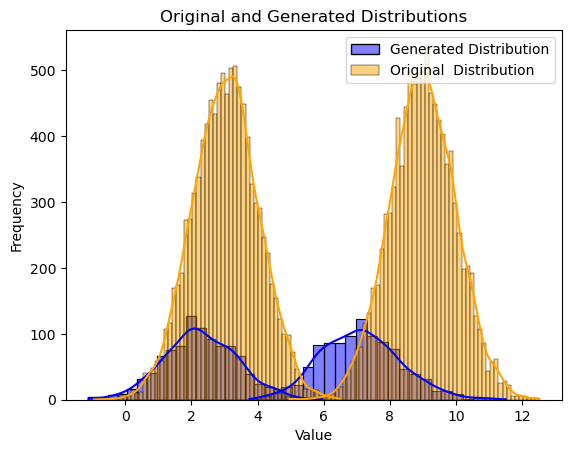

In [26]:
generate_num = 1000
x = torch.randn(generate_num,2)
samples = sample_simple(model, x,n_steps=3000).detach()
samples = samples.numpy()
samples.shape
print(samples)
sns.histplot(samples[:, 0], kde=True, label='Generated Distribution', color='blue', alpha=0.5)
sns.histplot(samples[:, 1], kde=True, color='blue', alpha=0.5)

sns.histplot(data[:, 0], kde=True, label='Original  Distribution', color='orange', alpha=0.5)
sns.histplot(data[:, 1], kde=True, color='orange', alpha=0.5)


plt.legend(loc='upper right')
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

NCSN function

In [27]:
def anneal_dsm_score_estimation(model, samples, labels, sigmas, anneal_power=2.):
    used_sigmas = sigmas[labels].view(samples.shape[0], *([1] * len(samples.shape[1:])))
    perturbed_samples = samples + torch.randn_like(samples) * used_sigmas
    target = - 1 / (used_sigmas ** 2) * (perturbed_samples - samples)
    scores = model(perturbed_samples, labels)
    target = target.view(target.shape[0], -1)
    scores = scores.view(scores.shape[0], -1)
    loss = 1 / 2. * ((scores - target) ** 2).sum(dim=-1) * used_sigmas.squeeze() ** anneal_power
    return loss.mean(dim=0)

In [28]:
import torch.nn.functional as F

class ConditionalLinear(nn.Module):
    def __init__(self, num_in, num_out, num_classes):
        super().__init__()
        self.num_out = num_out
        self.lin = nn.Linear(num_in, num_out)
        self.embed = nn.Embedding(num_classes, num_out)
        self.embed.weight.data.uniform_()

    def forward(self, x, y):
        out = self.lin(x)
        gamma = self.embed(y)
        out = gamma.view(-1, self.num_out) * out
        return out
    
class ConditionalModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.lin1 = ConditionalLinear(2, 128, num_classes)
        self.lin2 = ConditionalLinear(128, 128, num_classes)
        self.lin3 = nn.Linear(128, 2)
    
    def forward(self, x, y):
        x = F.softplus(self.lin1(x, y))
        x = F.softplus(self.lin2(x, y))
        return self.lin3(x)

In [29]:
sigma_begin = 1
sigma_end = 0.01
num_classes = 4
sigmas = torch.tensor(np.exp(np.linspace(np.log(sigma_begin), np.log(sigma_end), num_classes))).float()
# Our approximation model
model = ConditionalModel(num_classes)
# Create ADAM optimizer over our model
optimizer = optim.Adam(model.parameters(), lr=1e-3)
for t in range(500):
    # Compute the loss.
    labels = torch.randint(0, len(sigmas), (dataset.shape[0],))
    loss = anneal_dsm_score_estimation(model, dataset, labels, sigmas)
    # Before the backward pass, zero all of the network gradients
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    # Calling the step function to update the parameters
    optimizer.step()
    # Print loss
    if ((t % 50) == 0):
        print(loss)

tensor(1.0921, grad_fn=<MeanBackward1>)
tensor(0.8838, grad_fn=<MeanBackward1>)
tensor(0.8723, grad_fn=<MeanBackward1>)
tensor(0.8574, grad_fn=<MeanBackward1>)
tensor(0.8616, grad_fn=<MeanBackward1>)
tensor(0.8655, grad_fn=<MeanBackward1>)
tensor(0.8668, grad_fn=<MeanBackward1>)
tensor(0.8500, grad_fn=<MeanBackward1>)
tensor(0.8564, grad_fn=<MeanBackward1>)
tensor(0.8605, grad_fn=<MeanBackward1>)


In [30]:
def conditional_sample_simple(model, x,labels, n_steps=200, eps=1e-3,returnfinal= True):
    x_sequence = [x.unsqueeze(0)]
    for s in range(n_steps):
        x = x + eps * model(x,labels)+np.sqrt(2*eps)*torch.randn_like(x)
        x_sequence.append(x.unsqueeze(0))
    if returnfinal:
        return torch.cat(x_sequence)[-1,:]
    else:
        return torch.cat(x_sequence)

In [31]:
labels = torch.randint(0, len(sigmas), (generate_num,))
generate_num = 1000
x = torch.randn(generate_num,2)
samples = conditional_sample_simple(model, x,labels,n_steps=3000).detach()
samples = samples.numpy()
samples.shape
print(samples)

[[1.5918581  8.136499  ]
 [2.9106367  6.9508348 ]
 [1.8836268  7.6302958 ]
 ...
 [4.009186   7.966257  ]
 [0.49561667 6.323357  ]
 [3.8427505  7.440818  ]]


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

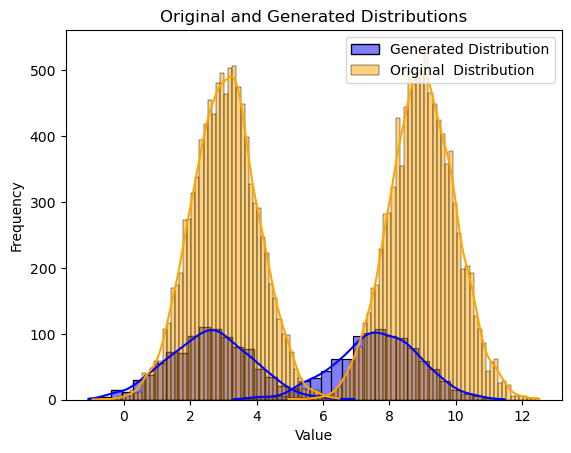

In [32]:
sns.histplot(samples[:, 0], kde=True, label='Generated Distribution', color='blue', alpha=0.5)
sns.histplot(samples[:, 1], kde=True, color='blue', alpha=0.5)

sns.histplot(data[:, 0], kde=True, label='Original  Distribution', color='orange', alpha=0.5)
sns.histplot(data[:, 1], kde=True, color='orange', alpha=0.5)

plt.legend(loc='upper right')
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

conditional denosing score matching

In [62]:
import numpy as np
import torch

# 生成双峰分布数据
data3 = np.random.multivariate_normal([3, 9], [[1, 0.5], [0.5, 1]], 10000)
coef1 = [5, 6]
coef2 = [-5, -6]
noise = np.random.randn(10000)

# 生成双峰目标变量
data4_1 = data3[:, 0] * coef1[0] + data3[:, 1] * coef1[1] + noise
data4_2 = data3[:, 0] * coef2[0] + data3[:, 1] * coef2[1] + noise
data4 = np.concatenate([data4_1[:5000], data4_2[5000:]])

# 合并数据
data = np.concatenate([data3, data4.reshape(-1, 1)], axis=1)
dataset = torch.tensor(data).float()

c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

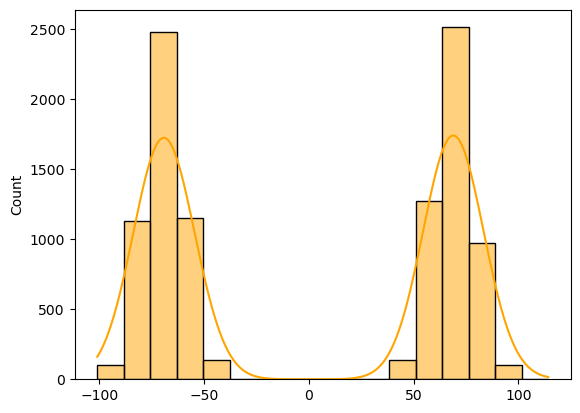

In [63]:
sns.histplot(data[:, -1], kde=True, label='Original  Distribution', color='orange', alpha=0.5)

In [64]:
import torch
import torch.nn as nn

class ConditionalModel(nn.Module):
    def __init__(self, input_dim=1, con_dim=2):
        super().__init__()
        self.linear_model1 = nn.Sequential(
            nn.Linear(input_dim, 8),
            nn.ReLU()
        )
        self.embedding_layer = nn.Linear(con_dim, 8)
        
        self.linear_model2 = nn.Sequential(            
            nn.Linear(16, 128),
            nn.ReLU(),
            
            nn.Linear(128, 2),
            nn.ReLU(),
            
            nn.Linear(2, input_dim),
        )
    def forward(self, x, con_x):   
        x = self.linear_model1(x)
        con_x = self.embedding_layer(con_x)
        x = torch.cat((x, con_x), dim=1)
        x = self.linear_model2(x)
        return x

def build_con_score_network(input_dim=1, con_dim=2, ):
    return ConditionalModel(input_dim, con_dim, )

def con_denoising_score_matching(scorenet, samples, xdata,sigma=0.01):
    perturbed_samples = samples + torch.randn_like(samples) * sigma
    target = - 1 / (sigma ** 2) * (perturbed_samples - samples)
    scores = scorenet(perturbed_samples,xdata)
    target = target.view(target.shape[0], -1)
    scores = scores.view(scores.shape[0], -1)
    loss = 1 / 2. * ((scores - target) ** 2).sum(dim=-1).mean(dim=0)
    return loss
def conditional_sample_simple(model, x,labels, n_steps=200,eps=1e-3,returnfinal= True):
    x_sequence = [x.unsqueeze(0)]
    for s in range(n_steps):
        x = x + eps * model(x,labels)+np.sqrt(2*eps)*torch.randn_like(x)
        x_sequence.append(x.unsqueeze(0))
    if returnfinal:
        return torch.cat(x_sequence)[-1,:]
    else:
        return torch.cat(x_sequence)
    

In [65]:
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
input_dim = 1
cmodel = build_con_score_network()
optimizer = optim.Adam(cmodel.parameters(), lr=1e-3)
scaler = StandardScaler()
scalery = StandardScaler()
dataset = torch.tensor(scaler.fit_transform(data)).float()
scalery.fit_transform(data[:,-1].reshape(-1,1))
ydata = dataset[:,-1].reshape(-1,1)
xdata = dataset[:,:-1]
for t in range(1000):
    # Compute the loss.
    loss = con_denoising_score_matching(cmodel, ydata,xdata,sigma=0.01)
    # Before the backward pass, zero all of the network gradients
    optimizer.zero_grad()
    # Backward pass: compute gradient of the loss with respect to parameters
    loss.backward()
    # Calling the step function to update the parameters
    optimizer.step()
    # Print loss
    if ((t % 50) == 0):
        print(loss)

tensor(4944.1909, grad_fn=<MulBackward0>)
tensor(4945.1221, grad_fn=<MulBackward0>)
tensor(5100.8618, grad_fn=<MulBackward0>)
tensor(5017.2983, grad_fn=<MulBackward0>)
tensor(5072.0972, grad_fn=<MulBackward0>)
tensor(5068.4902, grad_fn=<MulBackward0>)
tensor(4974.8608, grad_fn=<MulBackward0>)
tensor(4947.6128, grad_fn=<MulBackward0>)
tensor(5021.2188, grad_fn=<MulBackward0>)
tensor(4996.8794, grad_fn=<MulBackward0>)
tensor(5000.1558, grad_fn=<MulBackward0>)
tensor(4937.3584, grad_fn=<MulBackward0>)
tensor(4790.3813, grad_fn=<MulBackward0>)
tensor(4855.1401, grad_fn=<MulBackward0>)
tensor(4856.4971, grad_fn=<MulBackward0>)
tensor(4731.3594, grad_fn=<MulBackward0>)
tensor(4614.1094, grad_fn=<MulBackward0>)
tensor(4556.2090, grad_fn=<MulBackward0>)
tensor(4464.0156, grad_fn=<MulBackward0>)
tensor(4381.2979, grad_fn=<MulBackward0>)


tensor([[-0.7146],
        [-1.2012],
        [-0.7652],
        ...,
        [ 1.1378],
        [ 1.1822],
        [ 1.0304]])


c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\miaoz\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


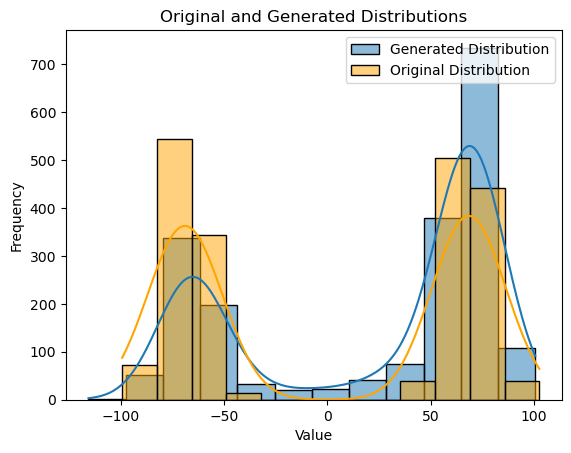

In [66]:
generate_num = 2000
x = torch.randn(generate_num, 1).reshape(-1, 1)
indices = torch.randint(0, dataset.shape[0], (generate_num,))
labels = dataset[indices, :-1]
samples = conditional_sample_simple(cmodel, x, labels, n_steps=20).detach()
print(samples)
samples = samples.numpy()
samples = scalery.inverse_transform(samples)
sns.histplot(samples, kde=True, label='Generated Distribution', color='blue', alpha=0.5)
sns.histplot(data[indices, -1], kde=True, label='Original Distribution', color='orange', alpha=0.5)
plt.legend(loc='upper right')
plt.title('Original and Generated Distributions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()